In [3]:
# Espacio de trabajo
import collections
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import codecs
nltk.download('stopwords')
from nltk.corpus import stopwords
spanish_stopwords=stopwords.words('spanish')
spanish_stopwords.extend(['ser', 'haber','colombia','colombianos', '|', '-', 'q', '1', '🇨🇴'])
%matplotlib inline
import sys
sys.path.append('../')
import funciones as fn
import re
import scipy
import numpy as np
import math
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
base = pd.read_excel('Violencia_Politica_Genero_marzo.xlsx')

C:\Users\usuario\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
df = fn.limpieza_base(base)
del_cols=["Query_Name", "Url", "Page_Type", "Language", "Country_Code", "Continent", "Continent_Code", 
          "Country", "Added", "Assignment", "Avatar", "Category_Details", 
          "Checked", "Display_URLs", "Expanded_URLs", "Facebook_Author_ID", "Facebook_Comments",
          "Facebook_Likes", "Facebook_Role", "Facebook_Shares", "Facebook_Subtype",
          "Full_Text", "Full_Name", "Instagram_Comments", "Instagram_Followers", "Instagram_Following",
          "Instagram_Likes", "Instagram_Interactions_Count", "Instagram_Posts",
          "Last_Assignment_Date", "Latitude", "Location_Name", "Longitude", "Media_Filter",
          "Media_URLs", "Original_Url", "Priority", "Short_URLs", "Resource_Id", "Starred",
          "Status", "Subtype", "Thread_Created_Date", "Thread_Id",
          "Thread_URL", "Twitter_Author_ID", "Twitter_Channel_Role", "Twitter_Reply_to", "Twitter_Retweet_of", 
          "Updated", "Blog_Name", "Copyright", "Item_Review", "Page_Type_Name", "Linkedin_Comments", 
          "Linkedin_Engagement", "Linkedin_Impressions", "Linkedin_Likes", "Linkedin_Shares", "Linkedin_Sponsored", 
          "Linkedin_Video_Views", "Parent_Blog_Name", "Parent_Post_Id", "Pub_Type", "Publisher_Sub_Type", "Rating", 
          "Reddit_Score", "Region", "Region_Code", "Root_Blog_Name", "Root_Post_Id", "Weblog_Title", "Title", "Tags"]
pruebas = codecs.open('Columnas_a_eliminar.txt','r',encoding='utf-8')
more_cols = list()
for line in pruebas.readlines():
    more_cols.append(line.strip())
del_cols = del_cols + more_cols
print(del_cols)
try:
    df = df.drop(del_cols, axis=1)
except:
    print('Do nothing')
for col in df.columns: 
    print(col)
df.head(11)

['Query_Name', 'Url', 'Page_Type', 'Language', 'Country_Code', 'Continent', 'Continent_Code', 'Country', 'Added', 'Assignment', 'Avatar', 'Category_Details', 'Checked', 'Display_URLs', 'Expanded_URLs', 'Facebook_Author_ID', 'Facebook_Comments', 'Facebook_Likes', 'Facebook_Role', 'Facebook_Shares', 'Facebook_Subtype', 'Full_Text', 'Full_Name', 'Instagram_Comments', 'Instagram_Followers', 'Instagram_Following', 'Instagram_Likes', 'Instagram_Interactions_Count', 'Instagram_Posts', 'Last_Assignment_Date', 'Latitude', 'Location_Name', 'Longitude', 'Media_Filter', 'Media_URLs', 'Original_Url', 'Priority', 'Short_URLs', 'Resource_Id', 'Starred', 'Status', 'Subtype', 'Thread_Created_Date', 'Thread_Id', 'Thread_URL', 'Twitter_Author_ID', 'Twitter_Channel_Role', 'Twitter_Reply_to', 'Twitter_Retweet_of', 'Updated', 'Blog_Name', 'Copyright', 'Item_Review', 'Page_Type_Name', 'Linkedin_Comments', 'Linkedin_Engagement', 'Linkedin_Impressions', 'Linkedin_Likes', 'Linkedin_Shares', 'Linkedin_Sponsored'

,Query_Name,Date,Title,Snippet,Url,Domain,Sentiment,Page_Type,Language,Country_Code,...,Tipos_de_Violencias_-_Desprestigio,Tipos_de_Violencias_-_Desprestigio_2,Tipos_de_Violencias_-_Fisico,Tipos_de_Violencias_-_Instrumentalización,Tipos_de_Violencias_-_MEnos._con_contenido_sexual,Tipos_de_Violencias_-_Menos._Capacidades,Tipos_de_Violencias_-_Menosprecio_con_contenido_sexual_o_mujer/objeto_de_deseo,Tipos_de_Violencias_-_Menosprecio_de_capacidades,Tipos_de_Violencias_-_Menosprecio_físico,Weblog_Title
0,Violencia Politica Genero,2022-03-08 08:55:27.0,@___vxlv @FranciaMarquezM gracias por ser el e...,@___vxlv @FranciaMarquezM gracias por ser el e...,http://twitter.com/___vxlv/statuses/1501119393...,twitter.com,positive,twitter,es,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,___vxlv (Vaaal🌺)
1,Violencia Politica Genero,2022-03-08 08:54:24.0,@PepetoNro0 @AngelaRosaDice Q yo sepa ella no ...,@PepetoNro0 @AngelaRosaDice Q yo sepa ella no ...,http://twitter.com/robertlanceccs/statuses/150...,twitter.com,negative,twitter,es,VEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,robertlanceccs (Robert Lance)
2,Violencia Politica Genero,2022-03-08 08:52:36.0,@CapitanRetFAC @MiguelPoloP @MariaFdaCabal @Fi...,@CapitanRetFAC @MiguelPoloP @MariaFdaCabal @Fi...,http://twitter.com/Jorge_Brizno/statuses/15011...,twitter.com,neutral,twitter,es,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jorge_Brizno (La verdad duele, la honestidad t..."
3,Violencia Politica Genero,2022-03-08 08:51:56.0,@Gonzalo65825689 @FranciaMarquezM @CamiloRomer...,@Gonzalo65825689 @FranciaMarquezM @CamiloRomer...,http://twitter.com/olenka0266/statuses/1501118...,twitter.com,negative,twitter,es,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,olenka0266 (olenka swerdlick)
4,Violencia Politica Genero,2022-03-08 08:51:51.0,@CathyJuvinao @AnaBejaranoRG @PaoHerreraC @jul...,@CathyJuvinao @AnaBejaranoRG @PaoHerreraC @jul...,http://twitter.com/gussyrodri/statuses/1501118...,twitter.com,negative,twitter,es,COL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gussyrodri (Gustavo Rodriguez)
5,Violencia Politica Genero,2022-03-08 08:51:46.0,@mocari14 @MargaritaRepo Es cierto que las gue...,@mocari14 @MargaritaRepo Es cierto que las gue...,http://twitter.com/danielvega2793/statuses/150...,twitter.com,negative,twitter,es,COL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,danielvega2793 (Daniel Vega Pinzon)
6,Violencia Politica Genero,2022-03-08 08:51:39.0,@Thor349 @MiguelPoloP @MariaFdaCabal @davidbar...,@Thor349 @MiguelPoloP @MariaFdaCabal @davidbar...,http://twitter.com/ohernandotovar/statuses/150...,twitter.com,neutral,twitter,es,COL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ohernandotovar (Ohernandotovar)
7,Violencia Politica Genero,2022-03-08 08:50:34.0,"@FranciaMarquezM payasa, solo es el payaso de...","@FranciaMarquezM payasa, solo es el payaso del...",http://twitter.com/olenka0266/statuses/1501118...,twitter.com,negative,twitter,es,NaN,...,X,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,olenka0266 (olenka swerdlick)
8,Violencia Politica Genero,2022-03-08 08:50:10.0,@MariaFdaCabal Las “grandes propuestas” dignas...,@MariaFdaCabal Las “grandes propuestas” dignas...,http://twitter.com/ArcSainte/statuses/15011180...,twitter.com,positive,twitter,es,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ArcSainte (Sainte Jeanne d'Arc)
9,Violencia Politica Genero,2022-03-08 08:49:42.0,Todo clarito @Mariana38311921 @MariaFdaCabal @...,Todo clarito @Mariana38311921 @MariaFdaCabal @...,http://twitter.com/TovarKleyber/statuses/15011...,twitter.com,neutral,twitter,es,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TovarKleyber (kleyber tovar)


In [13]:
#Eliminamos los URL: Todo lo que empieza por  HTTP
df['Clean_Text']=df['Snippet'].replace(r"http\S+", '', regex=True)
#Eliminamos todos los hashtags
df['Clean_Text']=df['Clean_Text'].replace('#\\w+', '', regex=True)
#Eliminamos los signos de puntuación repetidos dentro de los tweets
df['Clean_Text']=df['Clean_Text'].replace(r'([^0-9a-zA-Z])\1+', r'\1', regex=True)
#Eliminamos los signos de puntuación al inicio de un tweet
df['Clean_Text']=df['Clean_Text'].replace(r'^[^0-9a-zA-Z@#]+', '', regex=True)
#Eliminamos los dobles espacios
df['Clean_Text']=df['Clean_Text'].replace(r'()\1+', r'\1\1', regex=True)
#Eliminamos las df repetivas dentro de las palabras
df['Clean_Text']=df['Clean_Text'].replace(r'(.)\1+', r'\1\1', regex=True)
# Quitar las comillas de los textos
df['Clean_Text']=df['Clean_Text'].replace('"', '', regex=True)
# Remover puntuaciones innecesarias
df['Clean_Text'] = df['Clean_Text'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
df['Clean_Text']=df['Clean_Text'].str.replace('RT', '')
# Remover mayúsculas de inicio de texto
df['Clean_Text'] = df['Clean_Text'].map(lambda x: x.lower())
#Autores
df['Clean_Text']=df['Clean_Text'].replace(r'@\w+', '', regex=True)
df['Clean_Text']=df['Clean_Text'].str.replace('rt', '')
#Espacios
df['Clean_Text']=df['Clean_Text'].str.strip()
df['Clean_Text']=df['Clean_Text'].replace('Document_No', '')
# Exclude stopwords 
spanish_stopwords=stopwords.words('spanish')
spanish_stopwords.extend(['ser', 'haber', 'si','no','va','ni','solo'])
#spanish_stopwords.extend(usuarios)
#spanish_stopwords.remove('no')
#spanish_stopwords.remove('ni')
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spanish_stopwords) and len(word)>1]))

In [14]:
snippets = df['Clean_Text']
wordcount = {}
for texts in snippets:
    texts = texts.lower().split(' ')
    for word in texts:
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        if word not in spanish_stopwords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1

In [15]:
# Print most common word
n_print = int(input("De que tamaño queremos el diccionario: "))
print("\nOK. Las {} palabras más populares son:\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

De que tamaño queremos el diccionario: 30

OK. Las 30 palabras más populares son:

 :  13754
petro :  7797
usted :  7020
pacto :  6225
colombia :  6081
así :  4901
voto :  4735
senado :  4449
país :  4413
votar :  4179
piedad :  3612
francia :  3593
bien :  3424
cabal :  3377
hace :  3266
tan :  3149
histórico :  3102
hacer :  3023
votos :  2984
puede :  2915
mejor :  2878
cámara :  2855
gente :  2854
congreso :  2817
presidente :  2722
política :  2693
cambio :  2679
paido :  2647
ud :  2626
ahora :  2616


<AxesSubplot:xlabel='Word'>

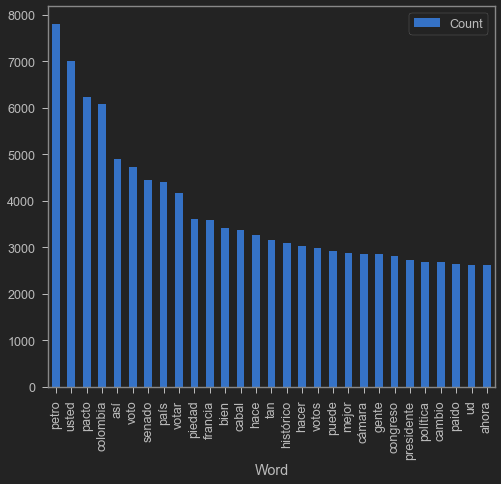

In [16]:
lst = word_counter.most_common(n_print)
if lst[0][0] == '':
    lst = lst[1:]
top = pd.DataFrame(lst[:30], columns = ['Word', 'Count'])
top.plot.bar(x='Word',y='Count')

In [17]:
print(df.columns.to_list())

['Query_Name', 'Date', 'Title', 'Snippet', 'Url', 'Domain', 'Sentiment', 'Page_Type', 'Language', 'Country_Code', 'Continent_Code', 'Continent', 'Country', 'City_Code', 'Account_Type', 'Added', 'Assignment', 'Author', 'Avatar', 'Category_Details', 'Checked', 'City', 'Display_URLs', 'Expanded_URLs', 'Facebook_Author_ID', 'Facebook_Comments', 'Facebook_Likes', 'Facebook_Role', 'Facebook_Shares', 'Facebook_Subtype', 'Full_Name', 'Full_Text', 'Gender', 'Hashtags', 'Impact', 'Impressions', 'Instagram_Comments', 'Instagram_Followers', 'Instagram_Following', 'Instagram_Interactions_Count', 'Instagram_Likes', 'Instagram_Posts', 'Interest', 'Last_Assignment_Date', 'Latitude', 'Location_Name', 'Longitude', 'Media_Filter', 'Media_URLs', 'Mentioned_Authors', 'Original_Url', 'Priority', 'Professions', 'Resource_Id', 'Short_URLs', 'Starred', 'Status', 'Subtype', 'Tags', 'Thread_Author', 'Thread_Created_Date', 'Thread_Entry_Type', 'Thread_Id', 'Thread_URL', 'Total_Monthly_Visitors', 'Twitter_Author_I

In [22]:

df = df.rename(columns={'Tipos_de_Violencias_-_Cuidado_del_hogar': 'Cuidado_hogar', 
                                        'Tipos_de_Violencias_-_Cuota_de_género': 'Cuota_genero', 
                                        'Tipos_de_Violencias_-_Desprestigio': 'Desprestigio', 
                                        'Tipos_de_Violencias_-_Desprestigio_2': 'Despretigio_2', 
                                        'Tipos_de_Violencias_-_Fisico': 'Violencia_fisica', 
                                        'Tipos_de_Violencias_-_Instrumentalización': 'Instrumentalización', 
                                        'Tipos_de_Violencias_-_MEnos._con_contenido_sexual': 'Menosprecio_sexual', 
                                        'Tipos_de_Violencias_-_Menos._Capacidades': 'Menosprecio_capacidades', 
                                        'Tipos_de_Violencias_-_Menosprecio_con_contenido_sexual_o_mujer/objeto_de_deseo':'Menosprecio_sexual_deseo', 
                                        'Tipos_de_Violencias_-_Menosprecio_de_capacidades':'Menosprecio_capacidades_2', 
                                        'Tipos_de_Violencias_-_Menosprecio_físico':'Menosprecio_fisico'})
lista_cols = ['Cuidado_hogar','Cuota_genero' , 
              'Desprestigio','Despretigio_2' ,'Violencia_fisica' ,
              'Instrumentalización' , 'Menosprecio_sexual', 'Menosprecio_capacidades','Menosprecio_sexual_deseo'
             ,'Menosprecio_capacidades_2','Menosprecio_fisico']
for col in lista_cols:
    df.loc[df[col] == 'X', col] = col
    df.loc[df[col].isnull(), col] = ''
df['Categoría_Barometro_v3'] = df['Cuidado_hogar'] + ', ' + df['Cuota_genero'] + ', ' + df['Desprestigio'] + ', ' + df['Despretigio_2'] + ', ' +df['Violencia_fisica'] + ', ' + df['Instrumentalización'] + ', ' + df['Menosprecio_sexual']+ ', ' + df['Menosprecio_capacidades']+ ', ' + df['Menosprecio_sexual_deseo']+ ', ' + df['Menosprecio_capacidades_2']+ ', ' + df['Menosprecio_fisico']
df.loc[df['Categoría_Barometro_v3'].str.find(',') == 0, 'Categoría_Barometro_v3'] = ''
df.loc[df['Categoría_Barometro_v3'].str.find(',') == 1, 'Categoría_Barometro_v3'] = ''
df.loc[df['Categoría_Barometro_v3'].str.find(' ') == 0, 'Categoría_Barometro_v3'] = ''
df['Categoría_Barometro_v3']=df['Categoría_Barometro_v3'].str.rstrip(', ')
df['Categoría_Barometro_v3']=df['Categoría_Barometro_v3'].str.rstrip(',')
df['Categoría_Barometro_v3']=df['Categoría_Barometro_v3'].replace(r'(,\s){1,}', '', regex=True)
df['Categoría_Barometro_v3']=df['Categoría_Barometro_v3'].replace(r'([A-Z])', r',\1', regex=True)
df['Categoría_Barometro_v3']=df['Categoría_Barometro_v3'].str.lstrip(',')

In [23]:
def search_palabra(df, tupla):
    """
    Retorna una pequeña DataFrame en donde todas las filas tienen almenos una mención de una palabra de interés
    """
    data = list()
    diccionario = dict()
    palabras = list()
    count = list()
    for l,j in tupla:
        palabras.append(l)
        count.append(j)
    i = 0
    for palabra in palabras:
        contiene = df[df['Clean_Text'].str.contains(palabra)]
        mean_reach = contiene['Reach_(new)'].mean()
        seguidores_promedio = contiene['Twitter_Followers'].mean()
        seguidores_max = contiene['Twitter_Followers'].max()
        impacto_promedio = contiene['Impact'].mean()
        impresiones_promedio = contiene['Impressions'].mean()
        if math.isnan(mean_reach):
            main_cat = ''
            main_sentiment = ''
        else:
            main_cat = contiene.Categoría_Barometro_v3.mode()[0]
            if main_cat == '':
                no_contiene = contiene[contiene['Categoría_Barometro_v3'] != '']
                try:
                    main_cat = no_contiene.Categoría_Barometro_v3.mode()[0]
                except:
                    main_cat = ''
            main_sentiment = contiene.Sentiment.mode()[0]
        diccionario = {'Palabra': palabra, 'Alcance promedio': mean_reach, 'Categoría principal': main_cat, 'Sentimiento principal': main_sentiment
                       ,'Veces usada': count[i], 'Seguidores promedio': seguidores_promedio, 'Seguidores máximo': seguidores_max, 'Impacto promedio': impacto_promedio
                       ,'Impresiones promedio': impresiones_promedio}
        i += 1
        data.append(diccionario)
    return pd.DataFrame(data)

In [24]:
prueba = search_palabra(df, lst)
prueba

,Palabra,Alcance promedio,Categoría principal,Sentimiento principal,Veces usada,Seguidores promedio,Seguidores máximo,Impacto promedio,Impresiones promedio
0,petro,2177.897723,"Cuidado_hogar,Cuota_genero,Menosprecio_sexual_...",negative,7797,8012.361097,7807534,10.262824,14630.457842
1,usted,1642.906908,"Cuidado_hogar,Despretigio_2,Menosprecio_capaci...",negative,7020,3220.351101,8242752,7.507898,6819.907618
2,pacto,3816.130118,,negative,6225,20444.499338,9367657,11.922014,31013.395895
3,colombia,2689.368914,"Cuidado_hogar,Claudia25,Saenz (,Claudia ,Saenz)",negative,6081,22590.693632,9369861,12.406040,30525.646322
4,así,2444.571753,,negative,4901,6381.474191,8242843,10.392856,12241.655879
5,voto,2679.345129,"Cuidado_hogar,Claudia25,Saenz (,Claudia ,Saenz)",negative,4735,5359.284887,8244185,11.207646,15199.352730
6,senado,5842.538275,"Cuidado_hogar,Violencia_fisica,Menosprecio_fisico",neutral,4449,43218.184152,9371932,19.100032,64880.709987
7,país,2434.683240,Cuidado_hogar,negative,4413,30497.819836,9360356,10.970529,38287.304637
8,votar,3380.354901,,negative,4179,7415.376468,8244207,12.756470,17778.877720
9,piedad,10928.676430,Cuidado_hogar,negative,3612,190689.108607,8246082,18.960363,233820.029595


In [25]:
prueba.to_excel('Diccionario_genero_marzo.xlsx')